In [1]:

import os, shutil


In [2]:
import pandas as pd
import numpy as np

In [3]:
ls

'03#Griffin Try to distinguish the type of art.ipynb'
 03_Griffin_Try_to_distinguish_the_type_of_art_batch.ipynb
 04#Training_Type_Multilabels.ipynb
 df_small.csv
 get_started_workspace.ipynb
 jpg2/
 rijksjpg.tar
 type_df.csv


## Import the csv

In [4]:
df = pd.read_csv('type_df.csv', index_col=0)

In [5]:
df

,type,tag,prent,tekening,boekillustratie,ornament,schilderij,historie,foto
0,schilderij,0000001_SK-A-4878,False,False,False,False,True,False,False
1,schilderij,0000002_SK-A-4877,False,False,False,False,True,False,False
2,schilderij,0000003_SK-A-4881,False,False,False,False,True,False,False
3,"['prent', 'historieprent']",0000004_RP-P-1992-35,True,False,False,False,False,True,False
4,"['prent', 'historieprent']",0000005_RP-P-1992-36,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
112034,schotel,0112410_AK-RBK-14763-A-2,False,False,False,False,False,False,False
112035,prent,0112411_RP-P-OB-86.512,True,False,False,False,False,False,False
112036,"['inktpot', 'deksel']",0112412_NG-NM-7753,False,False,False,False,False,False,False
112037,hartsvanger,0112413_NG-NM-8358,False,False,False,False,False,False,False


In [6]:
df['tag'] = df['tag'] + '.jpg'

In [7]:
df

,type,tag,prent,tekening,boekillustratie,ornament,schilderij,historie,foto
0,schilderij,0000001_SK-A-4878.jpg,False,False,False,False,True,False,False
1,schilderij,0000002_SK-A-4877.jpg,False,False,False,False,True,False,False
2,schilderij,0000003_SK-A-4881.jpg,False,False,False,False,True,False,False
3,"['prent', 'historieprent']",0000004_RP-P-1992-35.jpg,True,False,False,False,False,True,False
4,"['prent', 'historieprent']",0000005_RP-P-1992-36.jpg,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
112034,schotel,0112410_AK-RBK-14763-A-2.jpg,False,False,False,False,False,False,False
112035,prent,0112411_RP-P-OB-86.512.jpg,True,False,False,False,False,False,False
112036,"['inktpot', 'deksel']",0112412_NG-NM-7753.jpg,False,False,False,False,False,False,False
112037,hartsvanger,0112413_NG-NM-8358.jpg,False,False,False,False,False,False,False


## Set Up

In [8]:
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.models import Sequential
import keras

Using TensorFlow backend.


## Input X: Load Image as Numpy Arrary

In [9]:
columns=df.columns[2:]
columns

Index(['prent', 'tekening', 'boekillustratie', 'ornament', 'schilderij',
       'historie', 'foto'],
      dtype='object')

In [10]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [11]:
os.getcwd()

'/floyd/home'

In [12]:
train_generator=datagen.flow_from_dataframe(
dataframe=df[:104870],
directory="/floyd/home/jpg2",
x_col="tag",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(128,128))

Found 104870 validated image filenames.


In [13]:
valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[104870:107370],
directory="/floyd/home/jpg2",
x_col="tag",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(128,128))

Found 2500 validated image filenames.


In [14]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=df[107370:],
directory="/floyd/home/jpg2",
x_col="tag",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(128,128))

Found 4669 validated image filenames.


## Build the model

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='sigmoid'))
model.compile(keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

## Training Model

In [16]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=2
)

Epoch 1/2
3277/3277 [==============================] - 9110s 3s/step - loss: 0.1554 - accuracy: 0.9482 - val_loss: 0.2009 - val_accuracy: 0.9182
Epoch 2/2
3277/3277 [==============================] - 9035s 3s/step - loss: 0.1277 - accuracy: 0.9564 - val_loss: 0.2305 - val_accuracy: 0.9344


In [32]:
os.getcwd()

'/floyd/home'

In [33]:
model.save('griffin_guess_type_0926.h5')

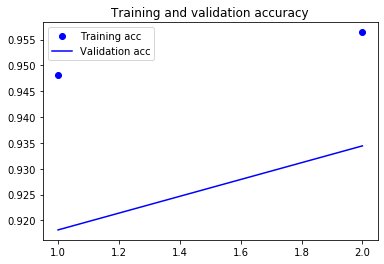

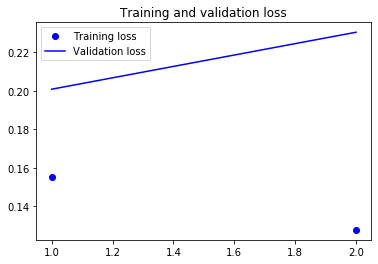

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()

## Prediction

In [21]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

4669/4669 [==============================] - 167s 36ms/step


In [22]:
pred_bool = (pred >0.5)

In [24]:
predictions = pred_bool.astype(int)

In [25]:
results=pd.DataFrame(predictions, columns=columns)

In [26]:
results["Files Name"]=test_generator.filenames

In [27]:

ordered_cols=["Files Name"]+columns

In [29]:
results

,prent,tekening,boekillustratie,ornament,schilderij,historie,foto,Files Name
0,1,0,0,0,0,0,0,0107739_RP-P-OB-83.583.jpg
1,1,0,0,0,0,0,0,0107740_RP-P-1951-54.jpg
2,0,0,0,0,0,0,0,0107741_BI-1887-1463-141.jpg
3,1,0,0,0,0,0,0,0107742_RP-P-OB-7261.jpg
4,1,0,0,0,0,0,0,0107743_RP-P-BI-5891.jpg
...,...,...,...,...,...,...,...,...
4664,0,0,0,0,0,0,0,0112410_AK-RBK-14763-A-2.jpg
4665,1,0,0,0,0,0,0,0112411_RP-P-OB-86.512.jpg
4666,0,0,0,0,0,0,0,0112412_NG-NM-7753.jpg
4667,0,0,0,0,0,0,0,0112413_NG-NM-8358.jpg


In [30]:
ordered_cols

Index(['Files Nameprent', 'Files Nametekening', 'Files Nameboekillustratie',
       'Files Nameornament', 'Files Nameschilderij', 'Files Namehistorie',
       'Files Namefoto'],
      dtype='object')

In [ ]:
results=results[ordered_cols]#To get the same column order


results.to_csv("results.csv",index=False)